In [79]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [10]:
url = "https://www.bbc.com/weather/293397"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'})
soup = BeautifulSoup(response.text, 'html.parser')

In [66]:
dates = soup.find_all('span', class_= 'wr-date__longish')
dates = [title.get_text().strip() for title in dates]
print(dates)

['Wed\xa01st', 'Thu\xa02nd', 'Fri\xa03rd', 'Sat\xa04th', 'Sun\xa05th', 'Mon\xa06th', 'Tue\xa07th', 'Wed\xa08th', 'Thu\xa09th', 'Fri\xa010th', 'Sat\xa011th', 'Sun\xa012th', 'Mon\xa013th']


In [22]:
temps = soup.find_all('span', class_= 'wr-value--temperature--c')
temps = [title.get_text().strip() for title in temps][:13]
print(temps)

['16°', '24°', '18°', '23°', '17°', '24°', '16°', '24°', '16°', '24°', '16°', '23°', '16°']


In [23]:
descriptions = soup.find_all('div', class_= 'wr-day__weather-type-description wr-js-day-content-weather-type-description wr-day__content__weather-type-description--opaque')
descriptions = [title.get_text().strip() for title in descriptions ][:13]
print(descriptions)


['Sunny and a gentle breeze', 'Misty and a gentle breeze', 'Drizzle and a gentle breeze', 'Sunny and a moderate breeze', 'Sunny and a gentle breeze', 'Sunny and a moderate breeze', 'Light rain showers and a moderate breeze', 'Sunny and a gentle breeze', 'Sunny and a moderate breeze', 'Sunny and a moderate breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze']


In [67]:
df = pd.DataFrame({'Date': dates, 'Temperature':temps, 'Description':descriptions})
df.head()


,Date,Temperature,Description
0,Wed 1st,16°,Sunny and a gentle breeze
1,Thu 2nd,24°,Misty and a gentle breeze
2,Fri 3rd,18°,Drizzle and a gentle breeze
3,Sat 4th,23°,Sunny and a moderate breeze
4,Sun 5th,17°,Sunny and a gentle breeze


In [29]:
df["Temperature"] = df["Temperature"].str[:-1]

In [30]:
df["Temperature"] = pd.to_numeric(df["Temperature"])

In [33]:
avg_temp = df.Temperature.mean()
print(avg_temp)

19.76923076923077


In [35]:
df.Description.value_counts()

Description
Sunny and a gentle breeze                   6
Sunny and a moderate breeze                 4
Misty and a gentle breeze                   1
Drizzle and a gentle breeze                 1
Light rain showers and a moderate breeze    1
Name: count, dtype: int64

In [56]:
df['Date']

0      Wed 1st
1      Thu 2nd
2      Fri 3rd
3      Sat 4th
4      Sun 5th
5      Mon 6th
6      Tue 7th
7      Wed 8th
8      Thu 9th
9     Fri 10th
10    Sat 11th
11    Sun 12th
12    Mon 13th
Name: Date, dtype: object

In [68]:
from datetime import datetime

# Get the current month and year
current_month = datetime.now().strftime('%B')
current_year = datetime.now().strftime('%Y')

# Original string

date = []
# Extract day from the original string
for day in df['Date']:
  original_string = day
  day = original_string.split()[1].replace('st', '').replace('nd', '').replace('rd', '').replace('th', '')
  # Combine day, month, and year
  date_string = f'{current_month} {day}, {current_year}'

  # Convert string to datetime object
  date_object = datetime.strptime(date_string, '%B %d, %Y')
  date.append(date_object)
df["Date"] = date



Wed 1st
Thu 2nd
Fri 3rd
Sat 4th
Sun 5th
Mon 6th
Tue 7th
Wed 8th
Thu 9th
Fri 10th
Sat 11th
Sun 12th
Mon 13th


In [69]:
df['Date']

0    2024-04-01
1    2024-04-02
2    2024-04-03
3    2024-04-04
4    2024-04-05
5    2024-04-06
6    2024-04-07
7    2024-04-08
8    2024-04-09
9    2024-04-10
10   2024-04-11
11   2024-04-12
12   2024-04-13
Name: Date, dtype: datetime64[ns]

In [77]:
df.sort_values('Temperature', ascending = False, inplace=True)

Text(0.5, 1.0, 'Temperatures day and night over Time')

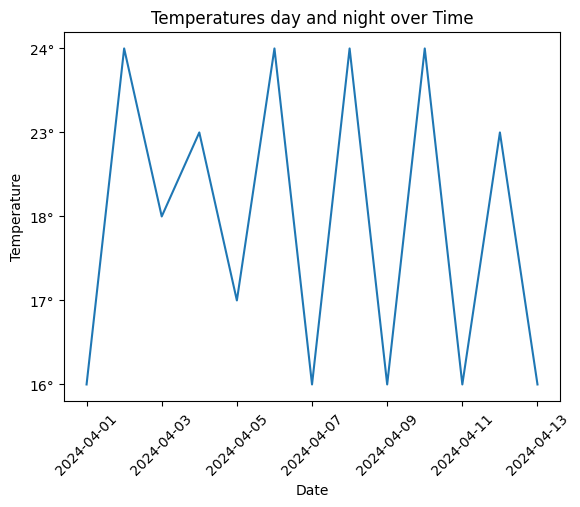

In [83]:
sns.lineplot(x='Date', y='Temperature', data = df)
plt.xticks(rotation=45)
plt.title("Temperatures day and night over Time")

Text(0.5, 1.0, 'Count of Description')

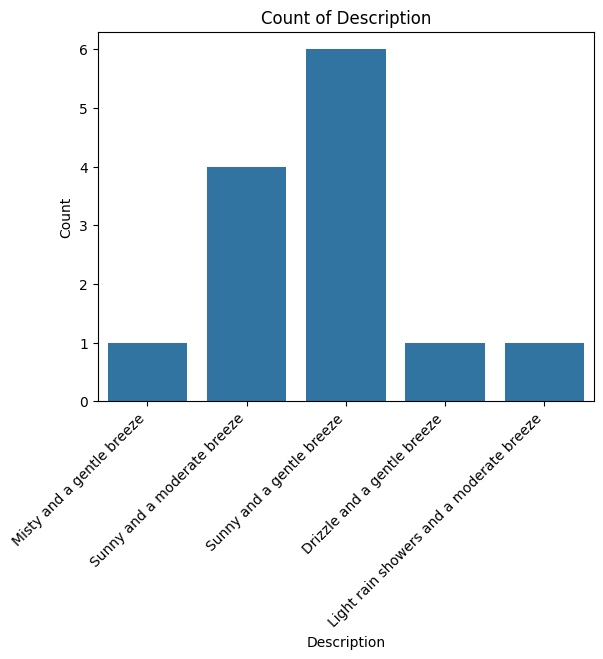

In [86]:
sns.countplot(data=df, x='Description')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Count of Description')

Conclusion:
Average temperature is around 20 degrees. Even fluctuation of temperature. Most days are sunny witz either a gentle breeze or moderate breeze.